# Erasmus Neural Networks
http://michalbereta.pl/nn
## MNIST database


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### How to save an object (the network) to file with pickle

In [22]:
import numpy as np

class SoftMaxLinear:
    def __init__(self, inputs_num, outputs_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W = (-1 + 2*np.random.rand(inputs_num, outputs_num))/100.0 #neurons as columns
        self.b = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        f = np.dot(X, self.W) + self.b
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases
        dW = np.dot(X.T, dprobs) # chain rule to calculate gradients
        db = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W = self.W - lrate*dW
        self.b = self.b - lrate*db
############################################################################
import pickle

X = np.loadtxt('data.txt')
labels = X[:,-1].astype('int32')
X = X[:,:-1]
print(X)
print(labels)

print()

net = SoftMaxLinear(2, 3)

(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
print(net.GetPredictions())

print('starting learning...')
counter = 0
max_iters = 100
while True:
    net.Learn(X, labels, 1)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter+1)
    print('probs:\n',net.probs)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    print(net.GetPredictions())
    counter += 1
    if counter > max_iters:
        break
    if dloss < 0.01:
        break
print('learning finished')

#save
f = open('my_softmax.net','wb')
pickle.dump(net, f)
f.close()

#load
f = open('my_softmax.net','rb')
net2 = pickle.load(f)
f.close()

#check
(dloss, erate, errors) = net2.Test(X, labels)
print('\n\nafter loading:')
print('probs:\n',net2.probs)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
print(net2.GetPredictions())

#really different objects!
print(id(net))
print(id(net2))


[[0.454 0.89 ]
 [0.37  0.804]
 [0.474 0.788]
 [0.206 0.338]
 [0.18  0.216]
 [0.272 0.258]
 [0.688 0.398]
 [0.614 0.294]
 [0.708 0.306]]
[0 0 0 1 1 1 2 2 2]

dloss: 1.0991071507263495
erate: 0.6666666666666666
errors: 6
[1 1 1 1 1 1 1 1 1]
starting learning...

iteration 1
probs:
 [[0.36758928 0.30255224 0.32985848]
 [0.36438835 0.30633226 0.32927939]
 [0.36341572 0.30444117 0.33214311]
 [0.34630974 0.32063554 0.33305472]
 [0.34159056 0.32401772 0.33439171]
 [0.3429833  0.32097217 0.33604453]
 [0.34720179 0.30849981 0.3442984 ]
 [0.34336315 0.31245992 0.34417694]
 [0.34352456 0.31009059 0.34638485]]
dloss: 1.0684878828273545
erate: 0.4444444444444444
errors: 4
[0 0 0 0 0 0 0 2 2]

iteration 2
probs:
 [[0.39256735 0.28368551 0.32374714]
 [0.3864789  0.29057515 0.32294595]
 [0.38435594 0.28712708 0.32851698]
 [0.35166349 0.31690123 0.33143528]
 [0.34264243 0.32313474 0.33422283]
 [0.3451712  0.31740821 0.33742059]
 [0.35239296 0.29417312 0.35343392]
 [0.34521259 0.30136456 0.35342285]
 [0



after loading:
probs:
 [[0.89817643 0.04639896 0.0554246 ]
 [0.8385131  0.09950183 0.06198507]
 [0.80439135 0.08171586 0.11389278]
 [0.1441952  0.72868915 0.12711565]
 [0.06347206 0.81970022 0.11682772]
 [0.09319632 0.70257687 0.20422681]
 [0.11327641 0.10692735 0.77979624]
 [0.07533214 0.18098711 0.74368075]
 [0.05735117 0.09912498 0.84352385]]
dloss: 0.23161571817156576
erate: 0.0
errors: 0
[0 0 0 1 1 1 2 2 2]
2656263072288
2657315993864


### MNIST database - read some samples

(10000, 785)
<class 'numpy.ndarray'>
float64
(784,)
(28, 28)


<IPython.core.display.Javascript object>


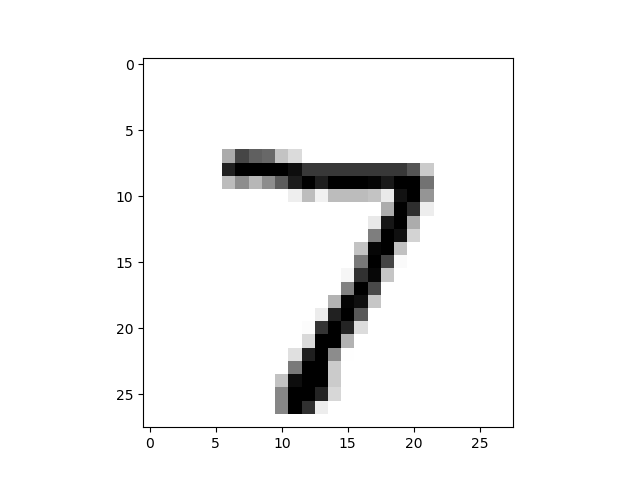

<IPython.core.display.Javascript object>


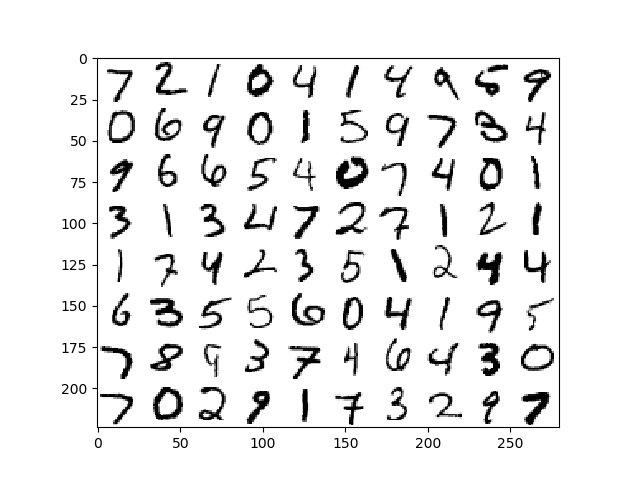

In [27]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

data = np.loadtxt('mnist_test.csv', delimiter=',')

print(data.shape)
print(type(data))
print(data.dtype)

#display the first of the images
im = data[0,1:] #the first column contains class label
print(im.shape)
im.shape = (28,28)
print(im.shape)
#print(im)
plt.imshow(im, cmap=plt.cm.binary)



#generate a display of several first images
rows = 8
cols = 10
counter = 0

images = None

for i in range(rows):
    current_row = None
    for j in range(cols):
        im = data[counter,1:].reshape(28,28)
        counter = counter + 1
        if current_row is None:
            current_row = im
        else:
            current_row = np.hstack((current_row, im))
    if images is None:
        images = current_row
    else:
        images = np.vstack((images, current_row))
        
plt.figure()
plt.imshow(images, cmap=plt.cm.binary)

plt.show()

### MNIST - example training with Linear SoftMax

Feel free to modify the following code, for example, add the code to save with pickle the network with the currect best results of the test data, so that you can later load it.

reading train data...
(60000, 784)
(60000,)

reading test data...
(10000, 784)
(10000,)

dloss: 2.3147547148661394
erate: 0.9459833333333333
errors: 56759
test dloss: 2.3143767699461866
test erate: 0.9465
test errors: 9465
starting learning...

iteration 1
dloss: 2.207955259323828
erate: 0.4819333333333333
errors: 28916
test dloss: 2.2054190802091025
test erate: 0.4688
test errors: 4688

iteration 2
dloss: 2.1108512380553104
erate: 0.3537
errors: 21222
test dloss: 2.1064078069078707
test erate: 0.3467
test errors: 3467

iteration 3
dloss: 2.0212876594343854
erate: 0.3085333333333333
errors: 18512
test dloss: 2.0151025297607448
test erate: 0.3046
test errors: 3046

iteration 4
dloss: 1.9383052106387135
erate: 0.28458333333333335
errors: 17075
test dloss: 1.9305128007620322
test erate: 0.2779
test errors: 2779

iteration 5
dloss: 1.8613468210649124
erate: 0.27093333333333336
errors: 16256
test dloss: 1.852068597220826
test erate: 0.2606
test errors: 2606

iteration 6
dloss: 1.78998573623

<IPython.core.display.Javascript object>


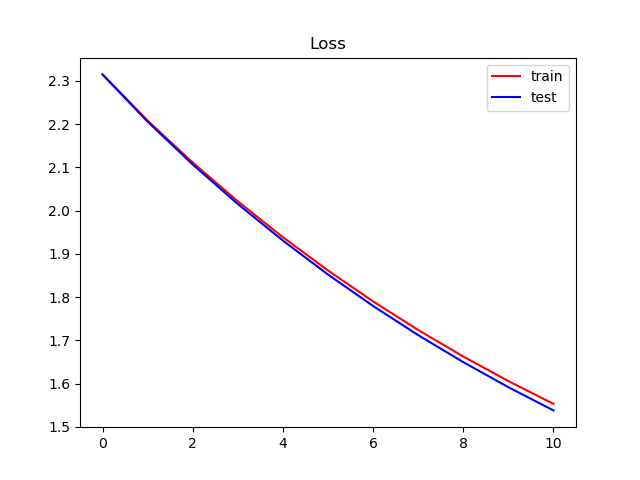

<IPython.core.display.Javascript object>


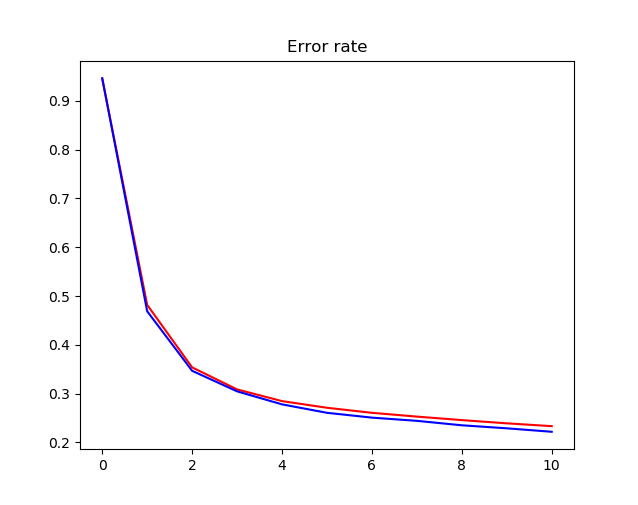

<IPython.core.display.Javascript object>


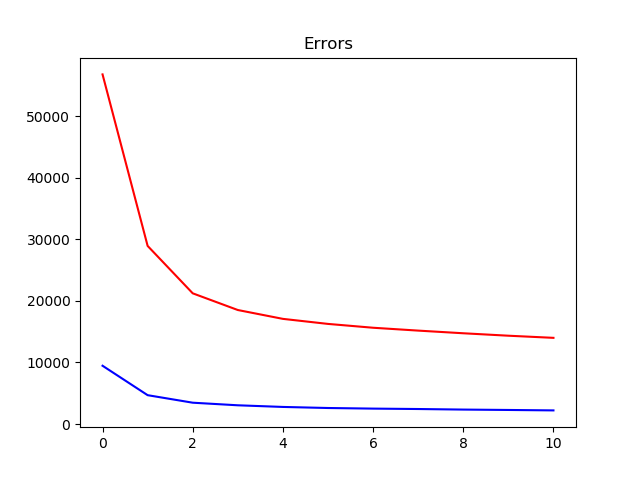

In [28]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

class SoftMaxLinear:
    def __init__(self, inputs_num, outputs_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W = (-1 + 2*np.random.rand(inputs_num, outputs_num))/100.0 #neurons as columns
        self.b = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        f = np.dot(X, self.W) + self.b
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases
        dW = np.dot(X.T, dprobs) # chain rule to calculate gradients
        db = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W = self.W - lrate*dW
        self.b = self.b - lrate*db
       
        
        


#train data
print('reading train data...')
X = np.loadtxt('mnist_train.csv', delimiter=',')
labels = X[:,0].astype('int32') #the first column contains class labels
X = X[:,1:] #the rest of the columns are pixel values
X = X/255.0 #simple cormalization
print(X.shape)
print(labels.shape)
print()

#test data
print('reading test data...')
Xte = np.loadtxt('mnist_test.csv', delimiter=',')
labelste = Xte[:,0].astype('int32') #the first column contains class labels
Xte = Xte[:,1:] #the rest of the columns are pixel values
Xte = Xte/255.0 #simple cormalization
print(Xte.shape)
print(labelste.shape)
print()


net = SoftMaxLinear(784, 10) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print('starting learning...')
counter = 1
max_iters = 10
min_loss = 0.1
while True:
    net.Learn(X, labels, 0.1)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_softmax_mnist.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()


### Task 1

- Use MLP and SoftMax with hidden layer(s) to train on MNIST, and check how much you can improve over linear SoftMax.

- Does regularization help to improve the test results?

- Prepare a report presenting your results. Send a pdf file with the report. Attach the source codes. Do not attach the databases.

- Send also the saved trained classifiers – check pickle_example to see how to save objects (your nets). Prepare the code to load the saved network and check the test results.


#### YOUR ANSWERS HERE
My results are as follows...-> this time present them in the report in a pdf file.

### MLP1HL

In [25]:
import numpy as np

class MLP1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector
#        limit1 = 4*np.sqrt(6.0/(inputs_num+hidden_num))
#        self.W1 = -limit1 + 2*limit1*np.random.rand(inputs_num, hidden_num) #neurons as columns        
#        limit2 = 4*np.sqrt(6.0/(hidden_num+outputs_num))
#        self.W2 = -limit2 + 2*limit2*np.random.rand(hidden_num, outputs_num) #neurons as columns
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        self.outs = np.dot(self.hout, self.W2) + self.b2
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.outs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.outs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, D):
        self.mse = np.linalg.norm(self.outs - D, axis=1).sum()/D.shape[0]
        return self.mse
    def LearnClassification(self, X, ClsIndx, lrate):
        pass
    def Update(self, X, D, lrate):
        #self.Forward(X)
        #gradients of outputs 
        ex_num = X.shape[0]
        dY = self.outs - D
        dY /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dY) # chain rule to calculate gradients
        db2 = np.sum(dY, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dY, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1
    def Learn(self, X, D, epochs, lrate):
        self.stats = []
        self.Forward(X)
        for i in range(epochs):
            self.Update(X, D, lrate)
            self.Forward(X)
            self.stats.append(self.GetMSE(D))

#train data
print('reading train data...')
X = np.loadtxt('mnist_train.csv', delimiter=',')
labels = X[:,0].astype('int32') #the first column contains class labels
X = X[:,1:] #the rest of the columns are pixel values
X = X/255.0 #simple cormalization
print(X.shape)
print(labels.shape)
print()

#test data
print('reading test data...')
Xte = np.loadtxt('mnist_test.csv', delimiter=',')
labelste = Xte[:,0].astype('int32') #the first column contains class labels
Xte = Xte[:,1:] #the rest of the columns are pixel values
Xte = Xte/255.0 #simple cormalization
print(Xte.shape)
print(labelste.shape)
print()


net = MLP1HL(784, 10, 20) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print('starting learning...')
counter = 1
max_iters = 100
min_loss = 0.1
while True:
    net.Learn(X, labels, max_iters, 0.1)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_mlp1HL_mnist.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()

reading train data...
(60000, 784)
(60000,)

reading test data...
(10000, 784)
(10000,)

dloss: nan
erate: 0.8978166666666667
errors: 53869
test dloss: nan
test erate: 0.899
test errors: 8990
starting learning...


D:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


ValueError: operands could not be broadcast together with shapes (60000,10) (60000,) 

### Softmax1HL

reading train data...
(60000, 784)
(60000,)

reading test data...
(10000, 784)
(10000,)

dloss: 2.3246583268448355
erate: 0.8876333333333334
errors: 53258
test dloss: 2.3240356990868536
test erate: 0.8865
test errors: 8865
starting learning...

iteration 1
dloss: 2.281592599472231
erate: 0.8806166666666667
errors: 52837
test dloss: 2.2809310124752
test erate: 0.8786
test errors: 8786

iteration 2
dloss: 2.2527818749952653
erate: 0.7936333333333333
errors: 47618
test dloss: 2.2519523947601154
test erate: 0.7844
test errors: 7844

iteration 3
dloss: 2.226301611764188
erate: 0.6805333333333333
errors: 40832
test dloss: 2.225215406560401
test erate: 0.6728
test errors: 6728

iteration 4
dloss: 2.1989583820221434
erate: 0.61175
errors: 36705
test dloss: 2.1975497130232933
test erate: 0.607
test errors: 6070

iteration 5
dloss: 2.1695910230023445
erate: 0.5543833333333333
errors: 33263
test dloss: 2.1678066668729885
test erate: 0.5544
test errors: 5544

iteration 6
dloss: 2.137643372099375
e

<IPython.core.display.Javascript object>


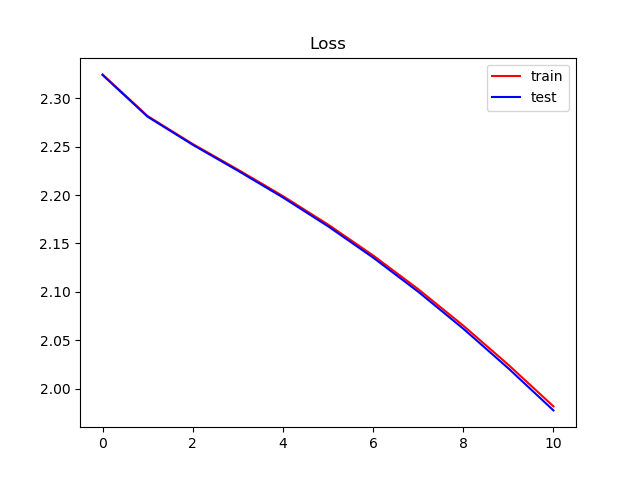

<IPython.core.display.Javascript object>


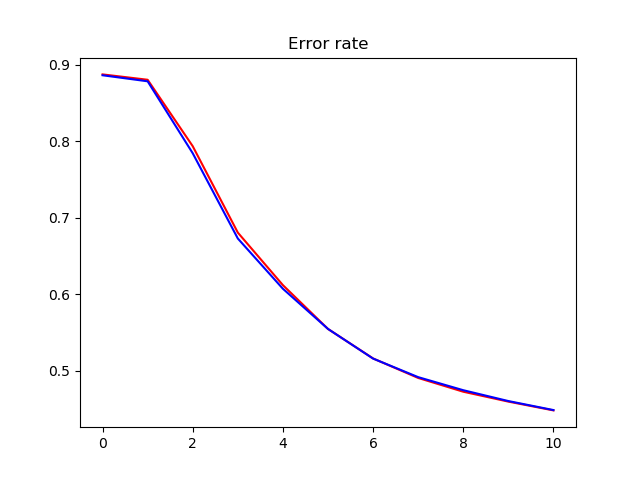

<IPython.core.display.Javascript object>


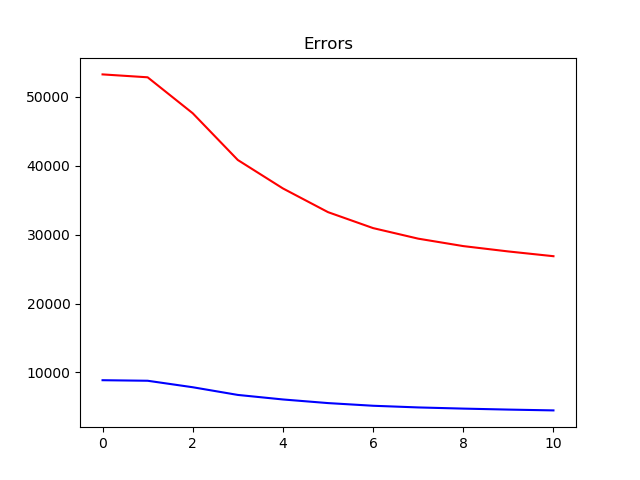

In [29]:
import numpy as np

class SoftMax1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector        
        self.probs = None
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        f = np.dot(self.hout, self.W2) + self.b2
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
        return self.probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Update(self, X, ClsIndx, lrate): 
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dprobs) # chain rule to calculate gradients
        db2 = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dprobs, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1       
    def Learn(self, X, ClsIndx, epochs, lrate):
        self.Forward(X)
        self.stats = []
        for i in range(epochs):
            self.Update(X, ClsIndx, lrate)
#            self.Forward(X) #not needed if self.Test() is called
            self.stats.append(self.Test(X, ClsIndx)[0])
    
#train data
print('reading train data...')
X = np.loadtxt('mnist_train.csv', delimiter=',')
labels = X[:,0].astype('int32') #the first column contains class labels
X = X[:,1:] #the rest of the columns are pixel values
X = X/255.0 #simple cormalization
print(X.shape)
print(labels.shape)
print()

#test data
print('reading test data...')
Xte = np.loadtxt('mnist_test.csv', delimiter=',')
labelste = Xte[:,0].astype('int32') #the first column contains class labels
Xte = Xte[:,1:] #the rest of the columns are pixel values
Xte = Xte/255.0 #simple cormalization
print(Xte.shape)
print(labelste.shape)
print()


net = SoftMax1HL(784, 10, 20) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print('starting learning...')
counter = 1
max_iters = 10
min_loss = 0.1
while True:
    net.Learn(X, labels, max_iters, 0.1)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_softmax1hl_mnist.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()

### Softmax2HL with Regularization

reading train data...
(60000, 784)
(60000,)

reading test data...
(10000, 784)
(10000,)

dloss: 2.3477924348368266
erate: 0.90085
errors: 54051
test dloss: 2.3464896031145757
test erate: 0.8991
test errors: 8991
starting learning...

iteration 1
eta 0.1
dloss: 2.3446496351720367
erate: 0.90085
errors: 54051
test dloss: 2.343386565686004
test erate: 0.8991
test errors: 8991

iteration 2
eta 0.1
dloss: 2.3417210327905176
erate: 0.90085
errors: 54051
test dloss: 2.3404962948593524
test erate: 0.8991
test errors: 8991

iteration 3
eta 0.1
dloss: 2.3389901521888183
erate: 0.90085
errors: 54051
test dloss: 2.3378023751978994
test erate: 0.8991
test errors: 8991

iteration 4
eta 0.1
dloss: 2.3364419940567727
erate: 0.90085
errors: 54051
test dloss: 2.3352898637619286
test erate: 0.8991
test errors: 8991

iteration 5
eta 0.1
dloss: 2.3340628772663092
erate: 0.90085
errors: 54051
test dloss: 2.3329451324616164
test erate: 0.8991
test errors: 8991

iteration 6
eta 0.1
dloss: 2.331840300833112
er

<IPython.core.display.Javascript object>


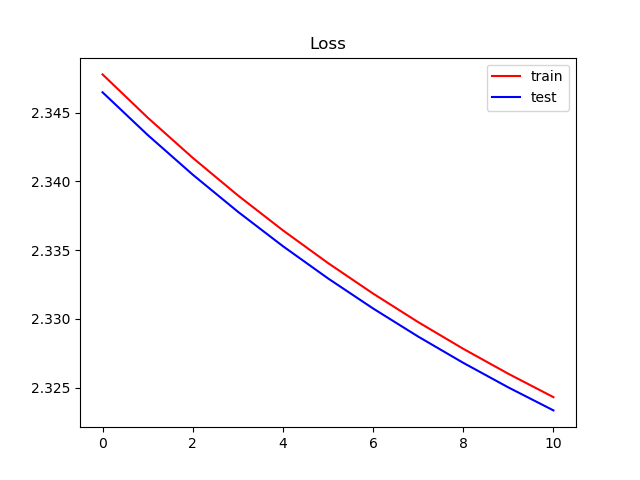

<IPython.core.display.Javascript object>


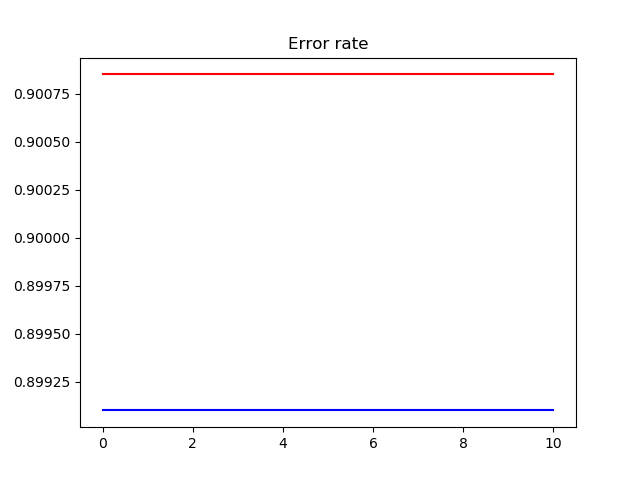

<IPython.core.display.Javascript object>


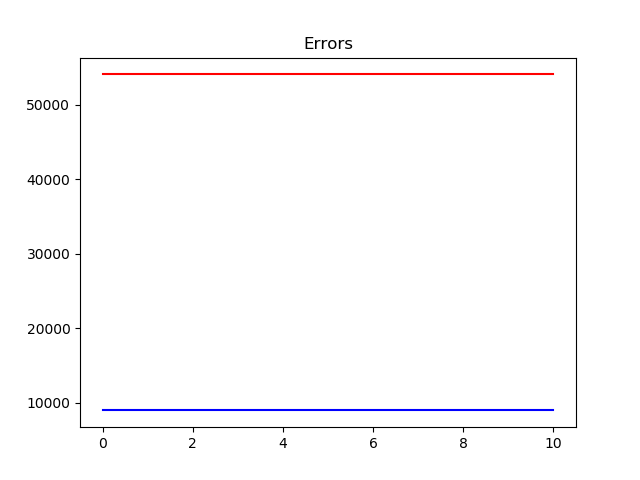

In [30]:
import numpy as np

class SoftMax2HL:
    def __init__(self, inputs_num, outputs_num, hidden_num1, hidden_num2):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num1))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num1)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num1, hidden_num2))/np.sqrt(hidden_num1) #neurons as columns
        self.b2 = np.zeros((1, hidden_num2)) #horizontal vector
        self.W3 = (-1 + 2*np.random.rand(hidden_num2, outputs_num))/np.sqrt(hidden_num2) #neurons as columns
        self.b3 = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        self.u1 = np.dot(X, self.W1) + self.b1
        self.hout1 = 1.0/(1.0 + np.exp(-self.u1))
        self.u2 = np.dot(self.hout1, self.W2) + self.b2
        self.hout2 = 1.0/(1.0 + np.exp(-self.u2))
        f = np.dot(self.hout2, self.W3) + self.b3
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW3 = np.dot(self.hout2.T, dprobs) # chain rule to calculate gradients
        db3 = np.sum(dprobs, axis=0,keepdims=True)
        
        #update neurons - output layer
        lmbda = 0.0001 # regularization parameter
        self.W3 = self.W3 - lrate*dW3 - lmbda*self.W3
        self.b3 = self.b3 - lrate*db3 - lmbda*self.b3
        self.dW3 = dW3
        self.db3 = db3
        
        #gradient of weights and biases - 2 hidden layer
        temp = np.dot(dprobs, self.W3.T)
        du2 = self.hout2*(1 - self.hout2)
        temp = temp * du2  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW2 = np.dot(self.hout1.T, temp) # chain rule to calculate gradients
        db2 = np.sum(temp, axis=0,keepdims=True)
        #update neurons - second hidden layer
        self.W2 = self.W2 - lrate*dW2 - lmbda*self.W2
        self.b2 = self.b2 - lrate*db2 - lmbda*self.b2       
        self.dW2 = dW2
        self.db2 = db2
        
        #gradient of weights and biases - 1 hidden layer
        temp = np.dot(temp, self.W2.T)
        du1 = self.hout1*(1 - self.hout1)
        temp = temp * du1  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons - first hidden layer
        self.W1 = self.W1 - lrate*dW1 - lmbda*self.W1
        self.b1 = self.b1 - lrate*db1 - lmbda*self.b1       
        self.dW1 = dW1
        self.db1 = db1
        
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle       
        


#train data
print('reading train data...')
X = np.loadtxt('mnist_train.csv', delimiter=',')
labels = X[:,0].astype('int32') #the first column contains class labels
X = X[:,1:] #the rest of the columns are pixel values
X = X/255.0 #simple cormalization
print(X.shape)
print(labels.shape)
print()

#test data
print('reading test data...')
Xte = np.loadtxt('mnist_test.csv', delimiter=',')
labelste = Xte[:,0].astype('int32') #the first column contains class labels
Xte = Xte[:,1:] #the rest of the columns are pixel values
Xte = Xte/255.0 #simple cormalization
print(Xte.shape)
print(labelste.shape)
print()


net = SoftMax2HL(784, 10, 20, 10) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print('starting learning...')
counter = 1
max_iters = 10
min_loss = 0.1

while True:
    etamin = 0.1
    etamax = 0.1
    eta = etamin + (1 - float(counter)/max_iters) * (etamax - etamin)
    if eta < etamin:
        eta = etamin
    net.Learn(X, labels, eta)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('eta',eta)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
#    print('W1 max:',net.W1.max())
#    print('b1 max:',net.b1.max())
#    print('W2 max:',net.W2.max())
#    print('b2 max:',net.b2.max())
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
#    if erate < 0.005:
#        break
#    if math.isnan(dloss):
#        break
#    if counter % 1000 == 0:
#        #save
#        f = open(str(counter)+'my_softmax1hl_mnist.net','wb')
#        pickle.dump(net, f)
#        f.close()
print('learning finished')

#save
f = open('my_softmax2hl_mnist.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()